# Results of temperature-home run regression
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

Data locations

In [2]:
loc_panel = "../Data/Panel/"
loc_reg = "../Data/RegressionResults/"

#### Analysis

First, panel data

In [3]:
y1 = 1954
y2 = 2019
y1_final = 1962
data = pd.read_csv(loc_panel+"baseball_climate_data_"+str(y1)+"-"+str(y2)+".csv")
data["tx"] = data.tmax_hadisd
data["tx2"] = (data.tx)**2
data["total_hr"] = data.visitor_hr + data.home_hr
data = data.loc[data.year.values>=y1_final,:]

time period coefficients

In [7]:
time_period_coefs = pd.read_csv(loc_reg+"homeruns_tx_poisson_time_periods.csv",index_col=0)

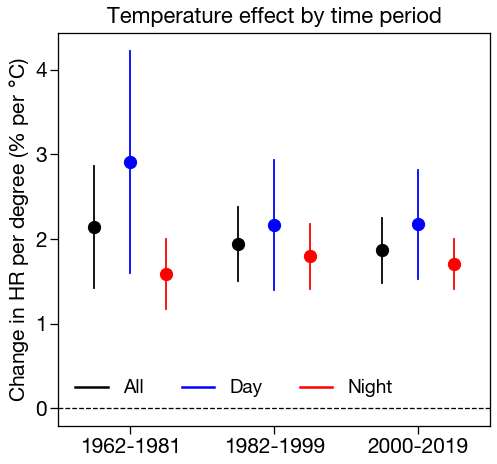

In [8]:
fig = plt.figure(figsize=(8,7))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 21.0
rcParams["axes.linewidth"] = 1.3
rcParams["xtick.major.size"] = 8
rcParams["xtick.major.width"] = 1.3
rcParams["ytick.major.size"] = 8
rcParams["ytick.major.width"] = 1.3

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0.2,right=0.95,top=0.9,bottom=0.12,wspace=0.19,hspace=0.3)

tfs = 22

ax = plt.subplot(gs1[0,0])
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

time_period_coefs_plot = time_period_coefs.iloc[:9,:]
xtcks = [0,1,2,4,5,6,8,9,10]
cols = ["black","blue","red",\
        "black","blue","red",\
        "black","blue","red"]
for x in np.arange(0,len(xtcks),1):
    mn = time_period_coefs_plot.iloc[x,:].beta*100
    lower = time_period_coefs_plot.iloc[x,:].ci2_5*100
    upper = time_period_coefs_plot.iloc[x,:].ci97_5*100

    plt.scatter(xtcks[x],mn,s=150,color=cols[x])
    if xtcks[x] == 8:
        plt.plot([xtcks[x],xtcks[x]],[lower,upper],color=cols[x],
             linestyle="-",linewidth=1.8,label="All")
    elif xtcks[x] == 9:
        plt.plot([xtcks[x],xtcks[x]],[lower,upper],color=cols[x],
             linestyle="-",linewidth=1.8,label="Day")
    elif xtcks[x] == 10:
        plt.plot([xtcks[x],xtcks[x]],[lower,upper],color=cols[x],
             linestyle="-",linewidth=1.8,label="Night")
    else:
        plt.plot([xtcks[x],xtcks[x]],[lower,upper],color=cols[x],
             linestyle="-",linewidth=1.8)

time_periods = ["1962-1981","1982-1999","2000-2019"]
plt.xticks(ticks=[1,5,9],labels=time_periods)

leg = plt.legend(loc="lower left",fontsize=19,frameon=False,
          bbox_to_anchor=(0,0.03,0,0),handlelength=1.7,ncol=3)
#title="game type"
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)
leg.get_title().set_fontsize("19")

plt.axhline(y=0,linewidth=1.3,color="black",linestyle="--")
plt.ylabel("Change in HR per degree (% per $\degree$C)")
plt.yticks([0,1,2,3,4])
plt.xlim([-1,11])
plt.title("Temperature effect by time period",fontsize=tfs,pad=10)


plt.savefig("../Figures/FigX_Time_Period_Coefs.pdf")
plt.show()